<a href="https://colab.research.google.com/github/MaitreePimple/Data-Science/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project i have used Telecom Dataset from kaggle

In [1]:
import io
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
print("shape:", df.shape)
print("\ncolumns:" , df.columns.to_list())
print("\ninfo:")
df.info()
print("\nSample value counts for target (Churn):")
print(df['Churn']. value_counts())
#This will check quickly datatype in each columns

shape: (7043, 21)

columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecuri

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("TotalCharges nulls:", df['TotalCharges'].isna().sum())
df[df['TotalCharges'].isna()]
#Thus will give how many nulls and missing rows are there in columns

TotalCharges nulls: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = 0.0
print("Now nulls:", df['TotalCharges'].isna().sum())

Now nulls: 0


In [15]:
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)

In [16]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns (object dtype):", cat_cols)

Categorical columns (object dtype): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [17]:
map_binary = {'Yes':1, 'No':0, 'Male':1, 'Female':0}
binary_cols = [c for c in cat_cols if df[c].nunique() == 2]
print("Binary categorical columns detected:", binary_cols)

for c in binary_cols:
    df[c] = df[c].map(map_binary)

Binary categorical columns detected: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [18]:
multi_cat_cols = [c for c in df.select_dtypes(include=['object']).columns]
print("Multi-category columns to one-hot:", multi_cat_cols)

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

Multi-category columns to one-hot: ['InternetService', 'Contract', 'PaymentMethod']


In [19]:
print(df.info())
print("\nAny remaining nulls per column:\n", df.isna().sum().sort_values(ascending=False).head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [20]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("\nChurn distribution (counts & percent):")
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))


Churn distribution (counts & percent):
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [21]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (5634, 23) Test shape: (1409, 23)


MODEL TRAINING

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
results = {}

In [23]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-score': f1_score(y_test, y_pred_lr)
}
#Logistic Regression

In [24]:
#Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf)
}

In [25]:
#XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-score': f1_score(y_test, y_pred_xgb)
}

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:46:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
#comparison table
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
results_df

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.8027,0.6509,0.5535,0.5983
Random Forest,0.7885,0.6284,0.4973,0.5552
XGBoost,0.7722,0.5831,0.4973,0.5368



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



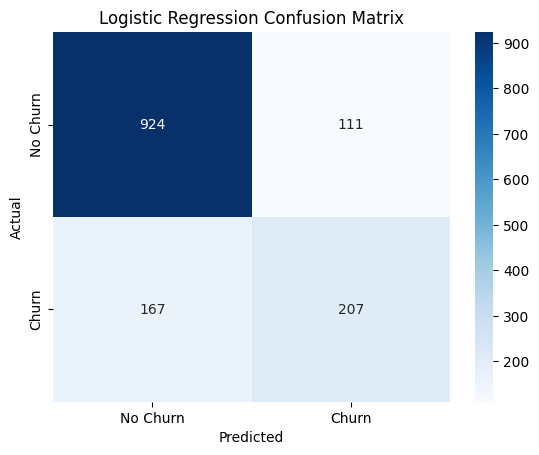


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



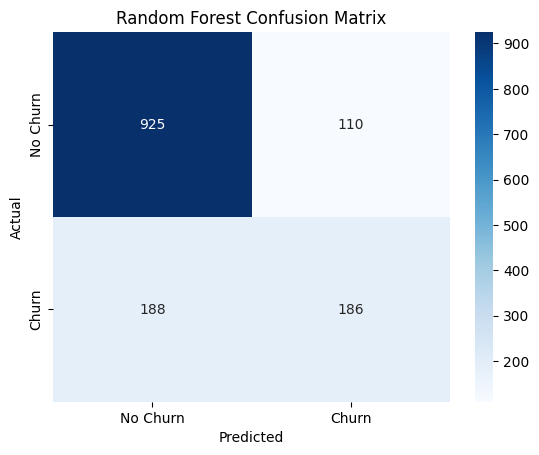


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



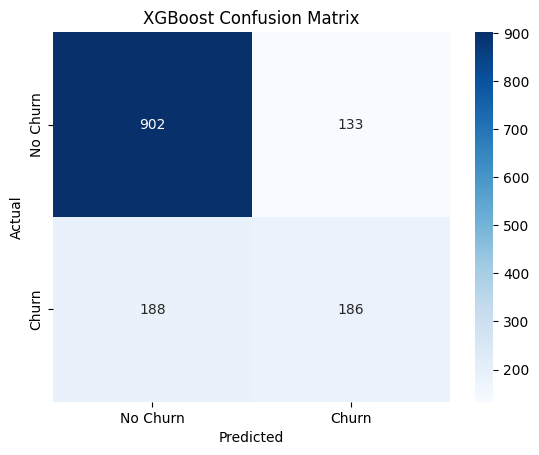

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for name, preds in models.items():
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, preds))

    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Feature Extraction and Visualizations

/tmp/ipython-input-2477114705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rf.values, y=top_rf.index, palette="viridis")


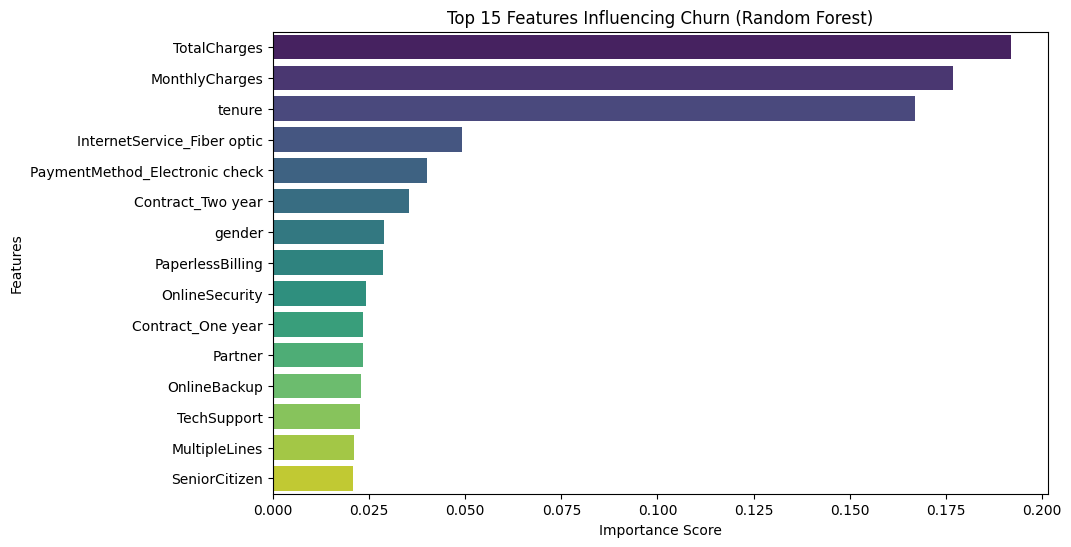

In [28]:
importances_rf = rf.feature_importances_
feat_importances_rf = pd.Series(importances_rf, index=X_train.columns)
top_rf = feat_importances_rf.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rf.values, y=top_rf.index, palette="viridis")
plt.title("Top 15 Features Influencing Churn (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

/tmp/ipython-input-3795964877.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_xgb.values, y=top_xgb.index, palette="magma")


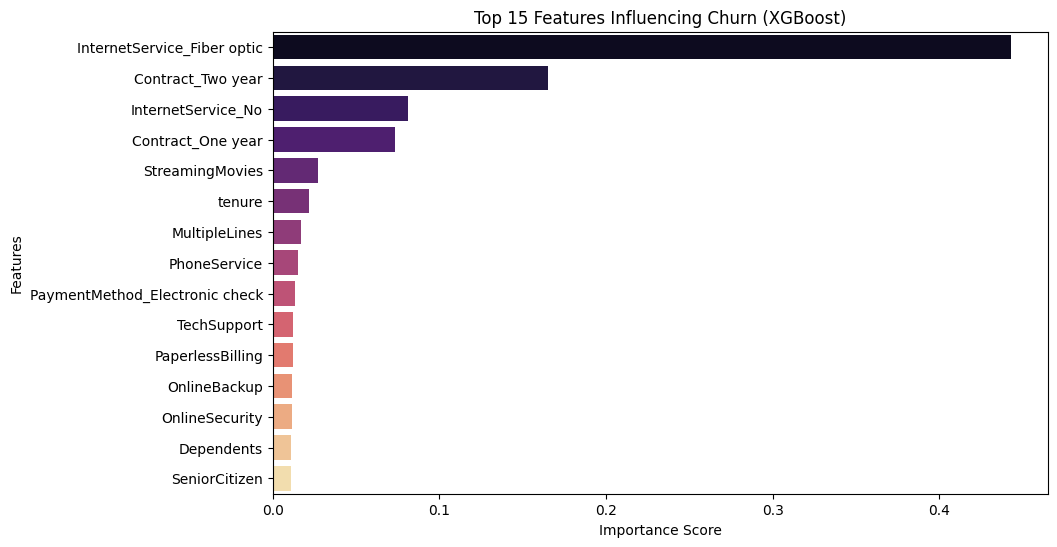

In [29]:
importances_xgb = xgb.feature_importances_
feat_importances_xgb = pd.Series(importances_xgb, index=X_train.columns)
top_xgb = feat_importances_xgb.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_xgb.values, y=top_xgb.index, palette="magma")
plt.title("Top 15 Features Influencing Churn (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

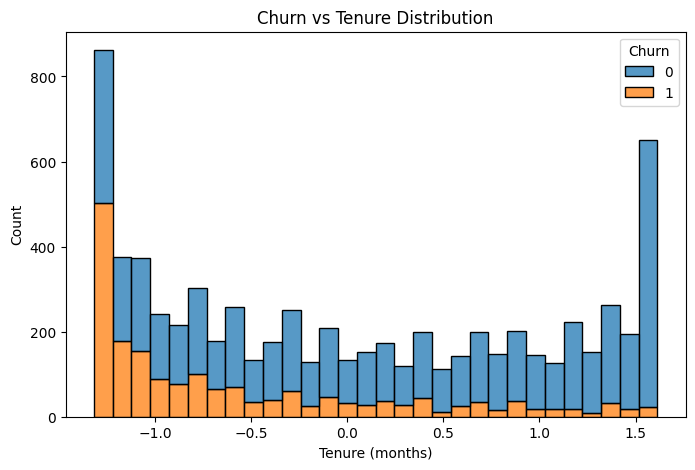

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(x="tenure", hue="Churn", data=df, bins=30, multiple="stack")
plt.title("Churn vs Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

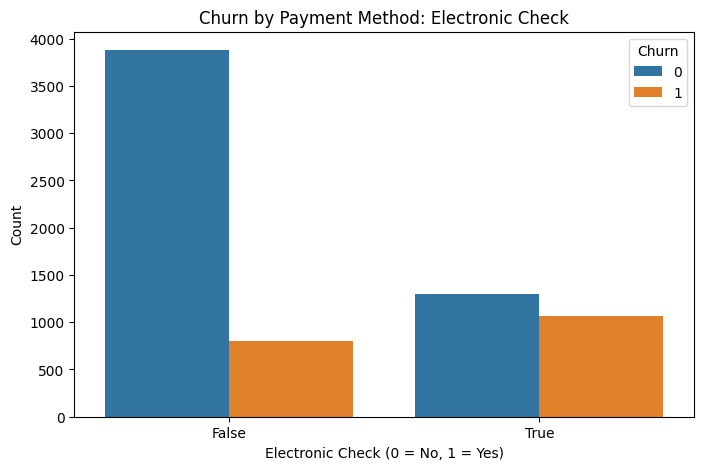

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x="PaymentMethod_Electronic check", hue="Churn", data=df)
plt.title("Churn by Payment Method: Electronic Check")
plt.xlabel("Electronic Check (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

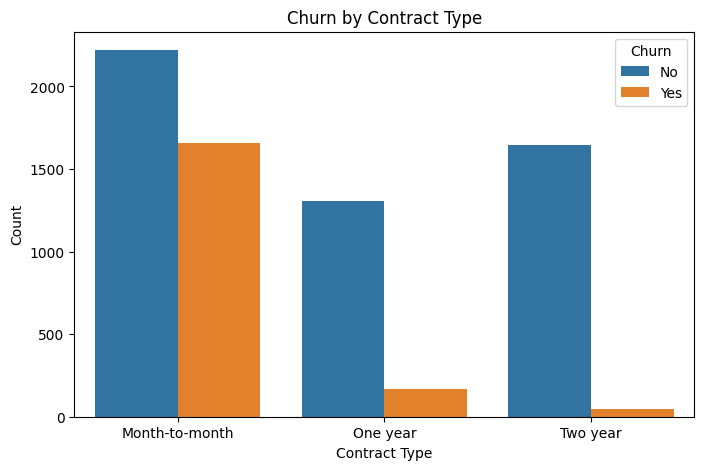

In [34]:
contract_cols = [col for col in df.columns if "Contract_" in col]

df_raw = pd.read_csv('Dataset.csv')

plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df_raw)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()